You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

In unit 2, we asked "what's the true proportion of ____?"

In this unit's project, we'll ask "What's the true average of \_\_\_\_?" or "What's the true amount of \_\_\__?"

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one prior, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The chemshift data anlysis portion of the Unit3NotesAK is your example. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- A posterior predictive check is more important than the posterior for this project. Ask me if you want to know why.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


Topic: Due to my investments in the stock markets, and due to the urge to invest more- I wanted to predict the stock of Nike for October 8th- and was finding the best likely hood to do so.

In [ ]:

!pip install "preliz[full,notebook]"

import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00


To accomplish this task, I utilized a dataset of the stock of Nike each day for almost 200 days leading up to October 8th.

In [ ]:
datacsv='https://raw.githubusercontent.com/VidhuGullapalli/Data-science-Homework/refs/heads/main/Data%20Science%20Data%20unit%203%20-%20Sheet1%20(1).csv'
dataread=pd.read_csv(datacsv)
dataread

,Date,Close
0,1/2/2025 16:00:00,73.67
1,1/3/2025 16:00:00,73.31
2,1/6/2025 16:00:00,72.00
3,1/7/2025 16:00:00,72.09
4,1/8/2025 16:00:00,71.29
...,...,...
186,10/1/2025 16:00:00,74.20
187,10/2/2025 16:00:00,74.57
188,10/3/2025 16:00:00,71.93
189,10/6/2025 16:00:00,71.17


(array([ 9., 16., 16., 19.,  6.,  7., 38., 39., 34.,  7.]),
 array([53.27 , 56.115, 58.96 , 61.805, 64.65 , 67.495, 70.34 , 73.185,
        76.03 , 78.875, 81.72 ]),
 <BarContainer object of 10 artists>)

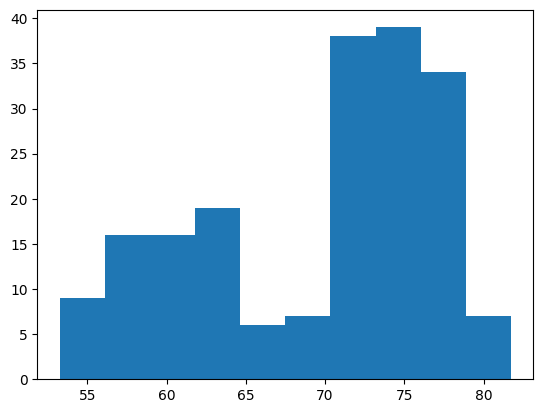

In [ ]:
plt.hist(dataread["Close"])

**bold text** Due to this data in the bar graph, it showcases that the data is skewed left.

<Axes: >

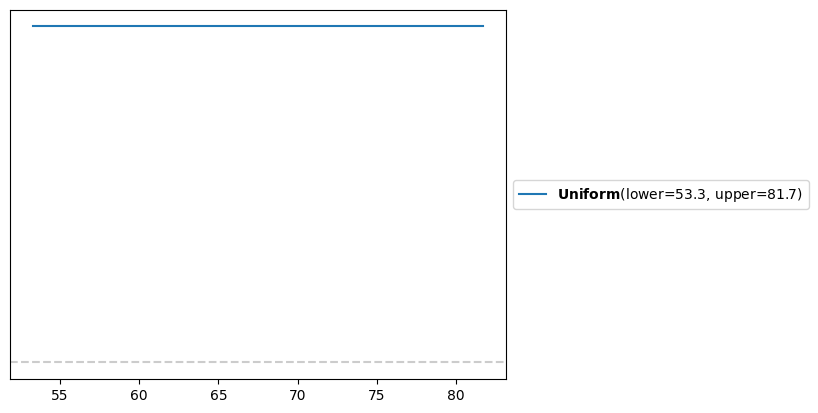

In [ ]:
pz.Uniform(lower=53.27, upper=81.72).plot_pdf()

<Axes: >

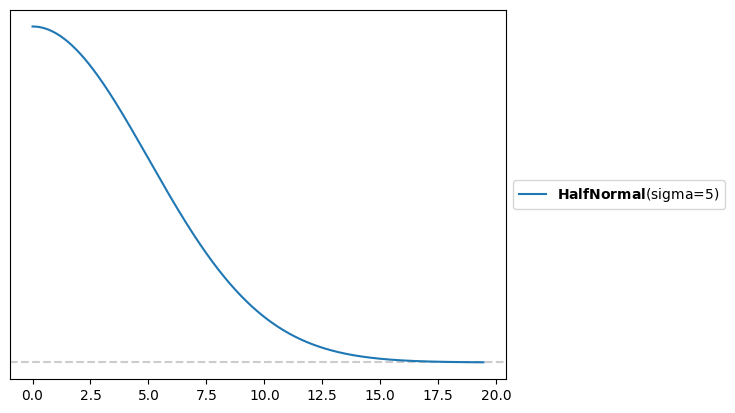

In [ ]:
pz.HalfNormal(sigma = 5).plot_pdf()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

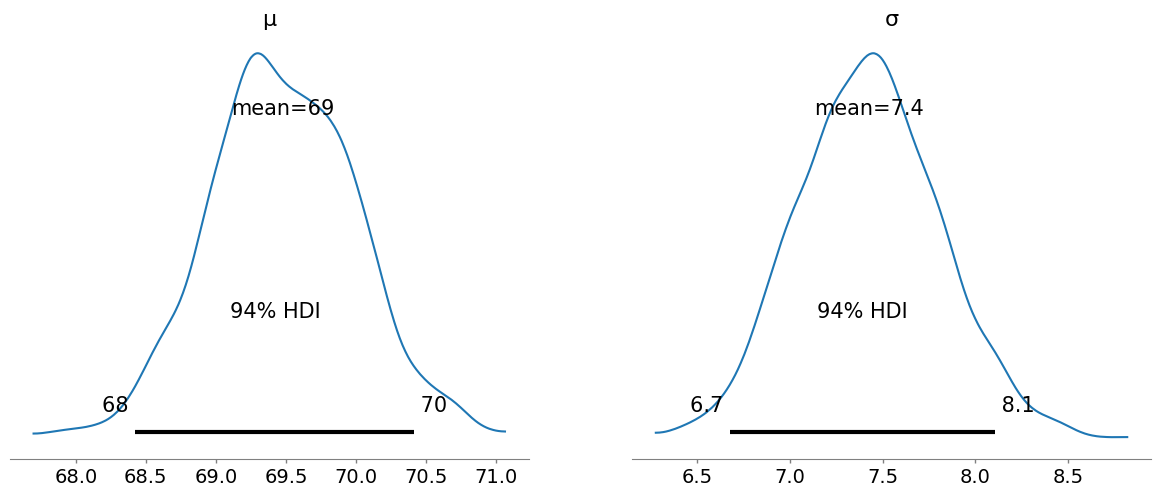

In [ ]:
#N for normal
with pm.Model() as model_act:
    μ = pm.Uniform('μ', lower=53.27, upper=81.72)
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=dataread["Close"])
    idata_chemshiftN = pm.sample()


az.plot_posterior(idata_chemshiftN)

In [ ]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_act, extend_inferencedata=True)


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

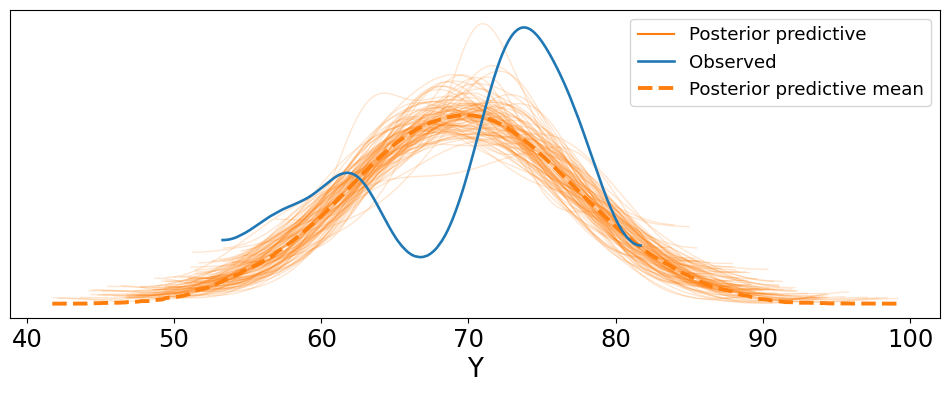

In [ ]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Although the predicted is okay, since the datga was skewed(specificaly to the left) I think there's a better likehood for the job.

In [1]:
#T is for Student's T distribution
#with pm.Model() as model_chemshiftT:
    # weak prior
   # μ = pm.Uniform('μ', lower=94.31, upper=188.89)

    #the same as before
   # σ = pm.HalfNormal('σ', sigma=5)

    #this is our normality parameter; lam = 1/30 gives a mean of 30
  #  ν = pm.Exponential('ν', lam = 1/30)

    #new likelihood, same data
  #  y = pm.StudentT('y', mu=μ, sigma=σ, nu = ν, observed=dataread["Close"])
   # idata_chemshiftT = pm.sample()

#ST is for skew T
with pm.Model() as model_chemshiftST:
    #same weak prior
    μ = pm.Uniform('μ', lower=53.27, upper=81.72)

    #same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #when a is larger than b, the dist. is positively skewed
    a = pm.HalfNormal('a', sigma=1)
    b = pm.HalfNormal('b', sigma=7)

    #SkewStudentR, which is the same as a T, except with more unusually high
    #or unusually low values.
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=dataread["Close"])
    idata_chemshiftST = pm.sample()



NameError: name 'pm' is not defined

In [ ]:
pm.sample_posterior_predictive(idata_chemshiftST, model=model_chemshiftST, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(50.0, 100.0)

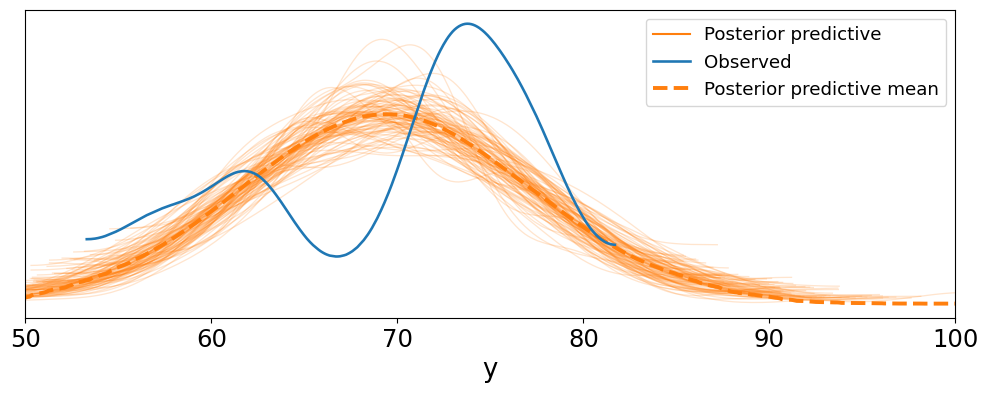

In [ ]:

#The following code block is taken from the textbook BAP3.
#Plots the posterior predictive density overlaid with a smoothed version of the data


ax = az.plot_ppc(idata_chemshiftST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(50, 100)

This model showcases that the predicted as negatively skewed, I set the beta more than the alpha to plot a negatively skewed model. And I feel this model aligns with my data better than the previous model.


Credits: Teddy helped me with the data on spreadsheets, specifically introduced me to the GOOGLE FINANCE(he saved me a lot of time with the data)